# Mount to google drive

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import package


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%tensorflow_version 2.x
import tensorflow as tf
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import csv
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Plot true value and predict value

In [68]:
def line_plot(predict_value, true_value, label1, label2, title, x_label, y_label):
  plt.figure(figsize=(30,5))
  x = np.arange(len(predict_value))
  plt.plot(x,true_value, label = label1)
  plt.plot(x,predict_value, label = label2)
  plt.legend()
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

# Random Forest

## Read File

In [92]:
root_dir = '/content/drive/My Drive/'  
base_dir = root_dir + 'Data Mining/Project/'
train_file = base_dir + 'Store Sales data/train.csv'
stores_file = base_dir + 'Store Sales data/stores.csv'
features_file = base_dir + 'Store Sales data/features.csv'
test_file = base_dir + 'Store Sales data/test.csv'

In [93]:
# read files
train_dataframe = pd.read_csv(train_file)
stores_dataframe = pd.read_csv(stores_file)
features_dataframe = pd.read_csv(features_file)
test_dataframe = pd.read_csv(test_file)
features_dataframe = features_dataframe.drop(columns='IsHoliday')

# join other tables
train_dataframe = pd.merge(train_dataframe, stores_dataframe, how='left', left_on='Store', right_on='Store')
train_dataframe = pd.merge(train_dataframe, features_dataframe,  how='left', left_on=['Store','Date'], right_on = ['Store','Date']) 


# convert date to week number
train_dataframe['Date'] = pd.to_datetime(train_dataframe['Date'], errors='coerce')
train_dataframe['Week_Number'] = train_dataframe['Date'].dt.week
test_dataframe['Date'] = pd.to_datetime(test_dataframe['Date'], errors='coerce')
test_dataframe['Week_Number'] = test_dataframe['Date'].dt.week


# convert a single column of boolean values to a column of integers 1 or 0
train_dataframe['IsHoliday'] = train_dataframe['IsHoliday'].astype(int)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [94]:
X = train_dataframe.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5','Temperature','CPI','Fuel_Price','Type','IsHoliday','Unemployment'])

## Kaggle test

In [ ]:
# X = train_dataframe.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5','Temperature','CPI','Fuel_Price','Type','IsHoliday','Unemployment','Weekly_Sales','Date'])
# y = train_dataframe['Weekly_Sales']

In [ ]:
# X_test = test_dataframe.drop(columns=['Date'])

## only store 1

In [95]:
X=X.loc[X['Store'] ==1]

##Split tran_test by time

In [96]:
threshold_date = pd.to_datetime('2012-08-03').strftime('%Y-%m-%d')

all_train = X[X.Date<threshold_date]
all_test = X[X.Date>=threshold_date]


X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)


y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']

## test one by one feature
* ('Temperature', 533934278.59034425),
* ('CPI', 529508108.7255757),
* ('Fuel_Price', 520366205.7366318),
* ('IsHoliday', 515135848.1683451),
* ('Week_Number', 512765408.0708253),
* ('Type', 497014475.3071928),
* ('Unemployment', 492938007.49758494),
* ('Size', 468185484.93382096),
* ('Store', 467723193.6942435),
* ('Dept', 238699969.94949397)

## result of random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)
rf_reg.fit(X_train, y_train)
rf_predict = rf_reg.predict(X_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


### grid search

In [82]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1900, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [83]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [84]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

### random forest with best parameter

In [90]:
rf_reg = RandomForestRegressor(n_estimators=100,max_features='log2',max_depth=70,min_samples_leaf=1,min_samples_split=5,verbose=1)
rf_reg.fit(X_train, y_train)
rf_predict = rf_reg.predict(X_test)
mean_squared_error(y_test, rf_predict)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


15327468.221195132

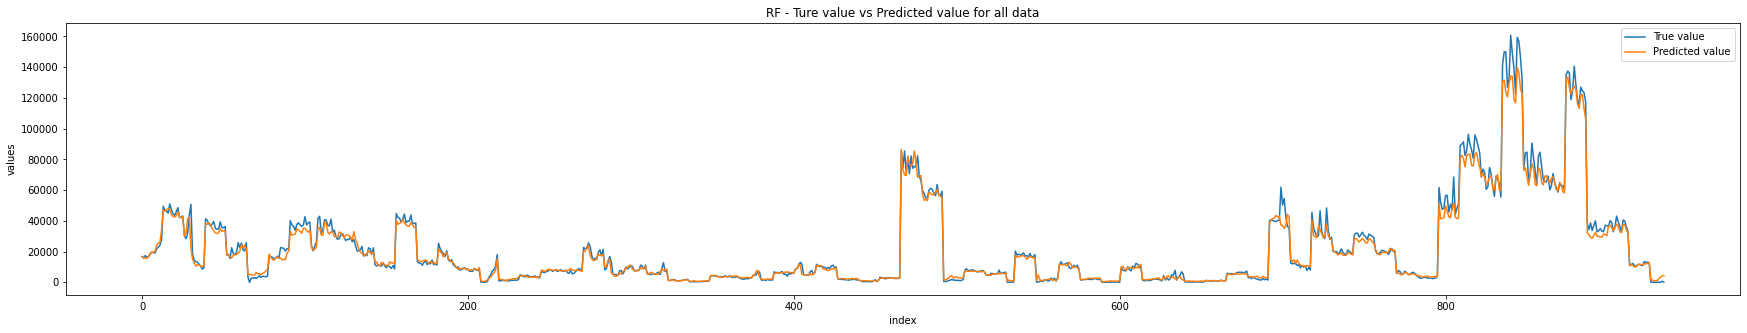

In [91]:
line_plot(rf_predict, y_test, 'True value','Predicted value', 'RF - Ture value vs Predicted value for all data', 'index','values')

In [101]:
rf_reg = RandomForestRegressor(n_estimators=100,max_features='log2',max_depth=70,min_samples_leaf=1,min_samples_split=5,verbose=1)   #store 1 with best parameter
rf_reg.fit(X_train, y_train)
rf_predict = rf_reg.predict(X_test)
mean_squared_error(y_test, rf_predict)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


16009129.851866793

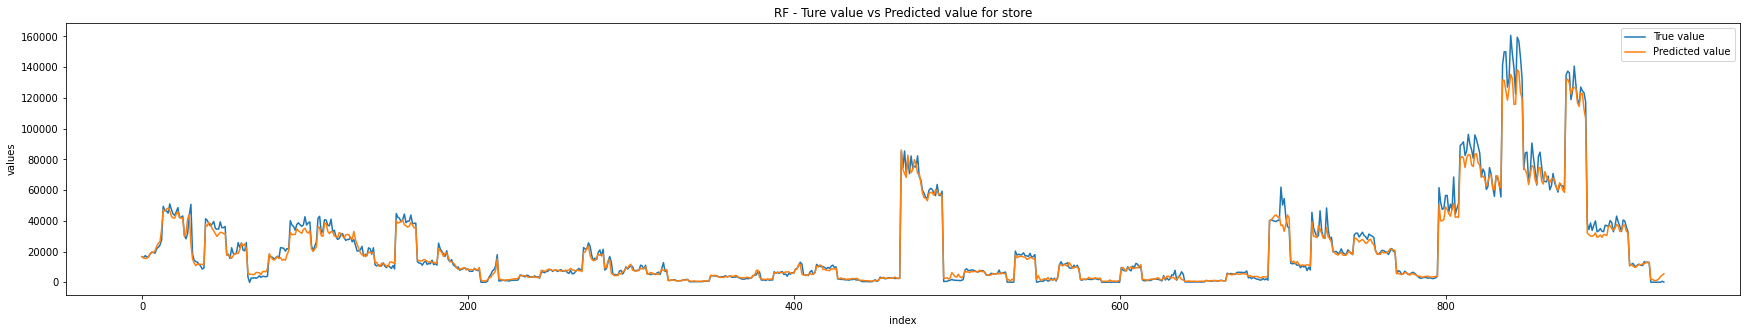

In [102]:
line_plot(rf_predict, y_test, 'True value','Predicted value', 'RF - Ture value vs Predicted value for store', 'index','values')

### experiment result

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, rf_predict)   # store 1

14414700.609990042

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, rf_predict)   # with all

113348041.532622

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, rf_predict)   # no type, store

85851033.42731367

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, rf_predict)     # no type store week_num

123300746.12652639

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, rf_predict)     # type & store encode

278802491.996698

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, rf_predict)   # week_num encode  drop type & store

268792601.06931746

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, rf_predict)   # without temperature,CPI，Fuel_Price

97863002.64464055

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, rf_predict)   # without type

97769443.01163077

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, rf_predict)   # without type/temperature/CPI/Fuel_Price/IsHoliday/Unemployment

39792914.93368779

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, rf_predict)   # without type/temperature/CPI/Fuel_Price/IsHoliday/Unemployment + store encode

94258119.03094381

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, rf_predict)   # without type/temperature/CPI/Fuel_Price/IsHoliday/Unemployment + test_train split(time 2012-08-03)

14270131.802328635

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, rf_predict)   # without type/temperature/CPI/Fuel_Price/IsHoliday/Unemployment + test_train split(time 2012-03-02)

15415638.211825158

## plot result

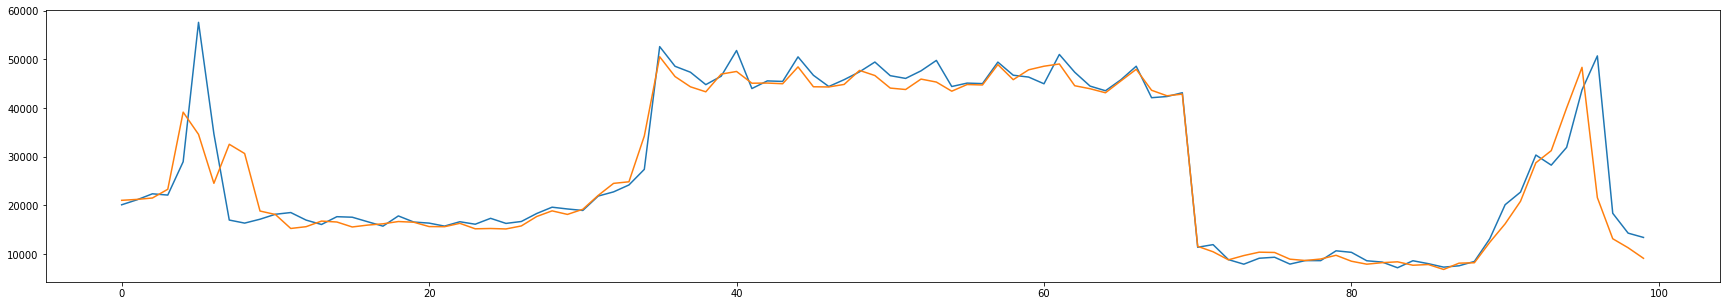

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(np.arange(1000),y_test[:1000])
plt.plot(np.arange(1000),rf_predict[:1000])


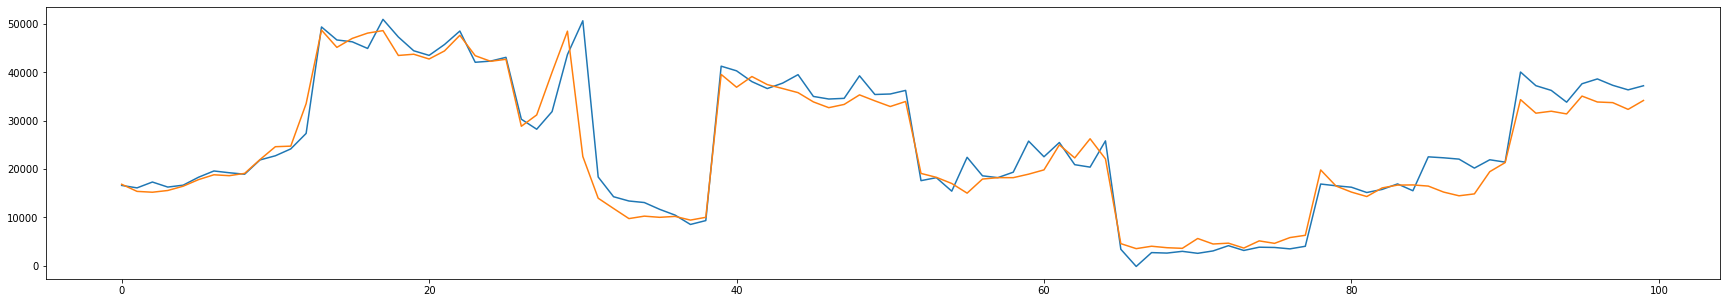

In [ ]:
plt.figure(figsize=(30,5))   #store 1
plt.plot(np.arange(100),y_test[:100])
plt.plot(np.arange(100),rf_predict[:100])

# SVM

## Inverse transform from normalize to original

In [ ]:
def inverse_transform(scaler, all_test, svm_holdout_predict):
  origin_all_test = scaler.inverse_transform(all_test)
  origin_y_test = origin_all_test[:,0]

  add_0_array = np.zeros((len(svm_holdout_predict), all_test.shape[1]-1))
  add_0_svm_holdout_predict = np.column_stack((svm_holdout_predict, add_0_array))
  add_0_svm_holdout_predict = scaler.inverse_transform(add_0_svm_holdout_predict) 
  origin_svm_holdout_predict = add_0_svm_holdout_predict[:,0]
  return origin_y_test, origin_svm_holdout_predict

## Read file

In [ ]:
root_dir = '/content/drive/My Drive/5502DataMining/' 
base_dir = root_dir + 'Data Mining/Project/'
train_file = base_dir + 'Store Sales data/train.csv'
stores_file = base_dir + 'Store Sales data/stores.csv'
features_file = base_dir + 'Store Sales data/features.csv'
test_file = base_dir + 'Store Sales data/test.csv'

In [ ]:
# read files
train_dataframe = pd.read_csv(train_file)
stores_dataframe = pd.read_csv(stores_file)
features_dataframe = pd.read_csv(features_file)
test_dataframe = pd.read_csv(test_file)
features_dataframe = features_dataframe.drop(columns='IsHoliday')

# join other tables
train_dataframe = pd.merge(train_dataframe, stores_dataframe, how='left', left_on='Store', right_on='Store')
train_dataframe = pd.merge(train_dataframe, features_dataframe,  how='left', left_on=['Store','Date'], right_on = ['Store','Date']) 


# convert date to week number
train_dataframe['Date'] = pd.to_datetime(train_dataframe['Date'], errors='coerce')
train_dataframe['Week_Number'] = train_dataframe['Date'].dt.week
test_dataframe['Date'] = pd.to_datetime(test_dataframe['Date'], errors='coerce')
test_dataframe['Week_Number'] = test_dataframe['Date'].dt.week


# convert a single column of boolean values to a column of integers 1 or 0
train_dataframe['IsHoliday'] = train_dataframe['IsHoliday'].astype(int)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


## Only store one and change Dept / Store / Type to one hot encoder

In [ ]:
# select store
train_dataframe = train_dataframe.loc[train_dataframe['Store'] == 1]

## Split train test --  compare normalize and un-normalize

### result of all data - normalized & unnormalized


#### all data -- no drop

In [ ]:
# data type 4
train_dataframe = pd.get_dummies(train_dataframe, columns=["Dept"])
train_dataframe = pd.get_dummies(train_dataframe, columns=["Store"])
train_dataframe = pd.get_dummies(train_dataframe, columns=["Type"])
train_dataframe = train_dataframe.fillna(0)

X = train_dataframe#.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5']) 

threshold_date = pd.to_datetime('2012-08-03').strftime('%Y-%m-%d')

all_train = X[X.Date<threshold_date]
all_test = X[X.Date>=threshold_date]

all_train = all_train.drop(columns=['Date'])
all_test = all_test.drop(columns=['Date'])

scaler = MinMaxScaler()
all_train = scaler.fit_transform(all_train)
all_test = scaler.fit_transform(all_test)

X_train = all_train[:, 1:]
X_test = all_test[:, 1:]

y_train = all_train[:, 0]
y_test = all_test[:, 0]
svr = SVR(kernel='rbf',gamma='auto').fit(X_train, y_train)
svm_holdout_predict = svr.predict(X_test)
origin_y_test, origin_svm_holdout_predict = inverse_transform(scaler, all_test, svm_holdout_predict)
mean_squared_error(origin_y_test, origin_svm_holdout_predict)

371939401.294963

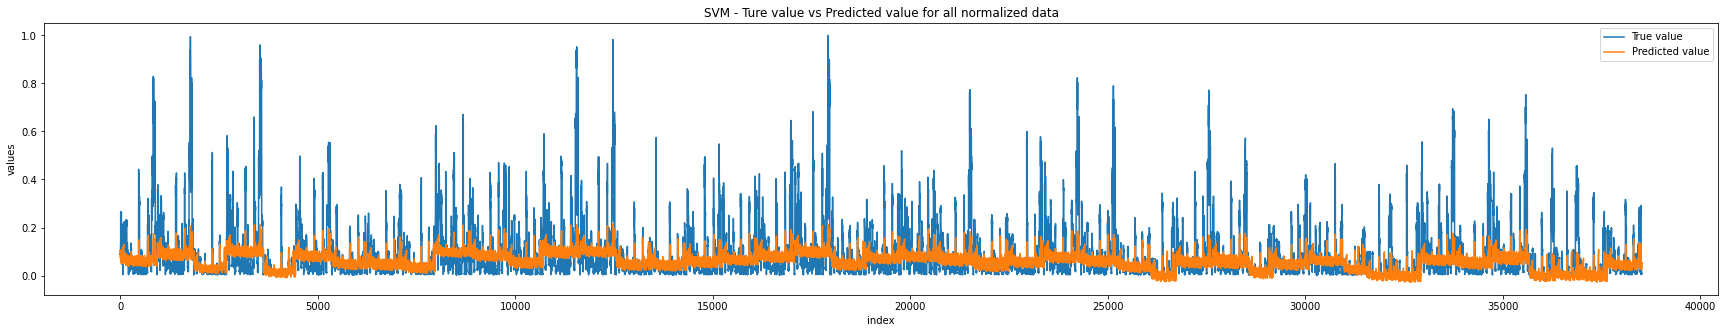

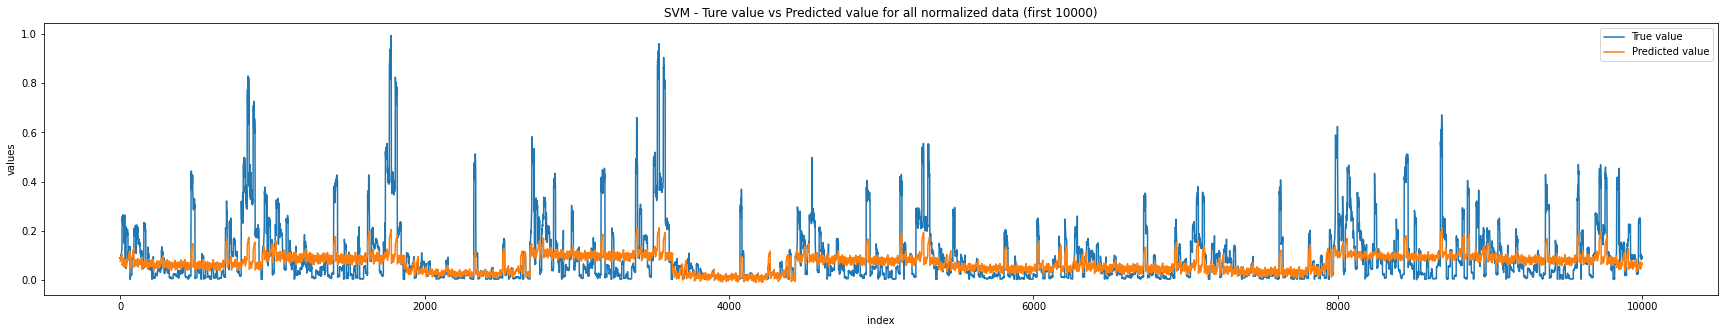

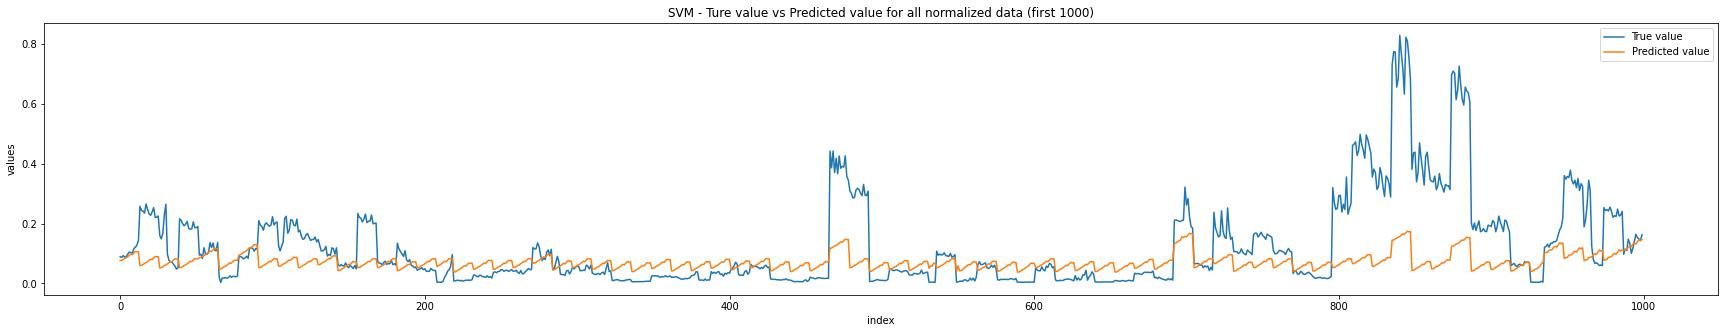

In [ ]:
line_plot(svm_holdout_predict, y_test, 'True value','Predicted value', 'SVM - Ture value vs Predicted value for all normalized data', 'index','values')
line_plot(svm_holdout_predict[:10000], y_test[:10000], 'True value','Predicted value', 'SVM - Ture value vs Predicted value for all normalized data (first 10000)', 'index','values')
line_plot(svm_holdout_predict[:1000], y_test[:1000], 'True value','Predicted value', 'SVM - Ture value vs Predicted value for all normalized data (first 1000)', 'index','values')

#### without markdown 1-5

In [ ]:
# data type 4
train_dataframe = pd.get_dummies(train_dataframe, columns=["Dept"])
train_dataframe = pd.get_dummies(train_dataframe, columns=["Store"])
train_dataframe = pd.get_dummies(train_dataframe, columns=["Type"])
train_dataframe = train_dataframe.fillna(0)

X = train_dataframe.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5']) 

threshold_date = pd.to_datetime('2012-08-03').strftime('%Y-%m-%d')

all_train = X[X.Date<threshold_date]
all_test = X[X.Date>=threshold_date]

all_train = all_train.drop(columns=['Date'])
all_test = all_test.drop(columns=['Date'])

scaler = MinMaxScaler()
all_train = scaler.fit_transform(all_train)
all_test = scaler.fit_transform(all_test)

X_train = all_train[:, 1:]
X_test = all_test[:, 1:]

y_train = all_train[:, 0]
y_test = all_test[:, 0]

svr = SVR(kernel='rbf',gamma='auto').fit(X_train, y_train)
svm_holdout_predict = svr.predict(X_test)
origin_y_test, origin_svm_holdout_predict = inverse_transform(scaler, all_test, svm_holdout_predict)
mean_squared_error(origin_y_test, origin_svm_holdout_predict)

370378594.20524675

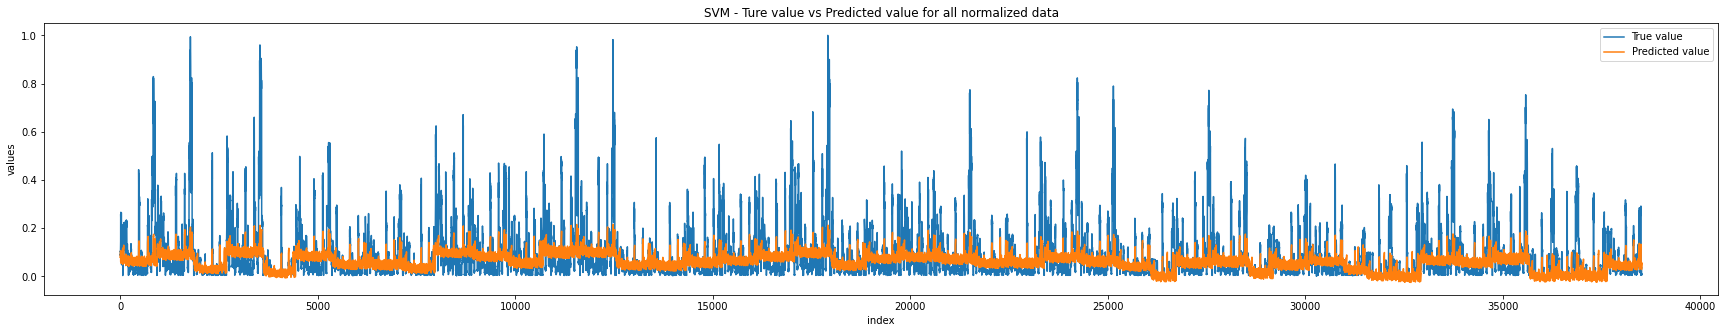

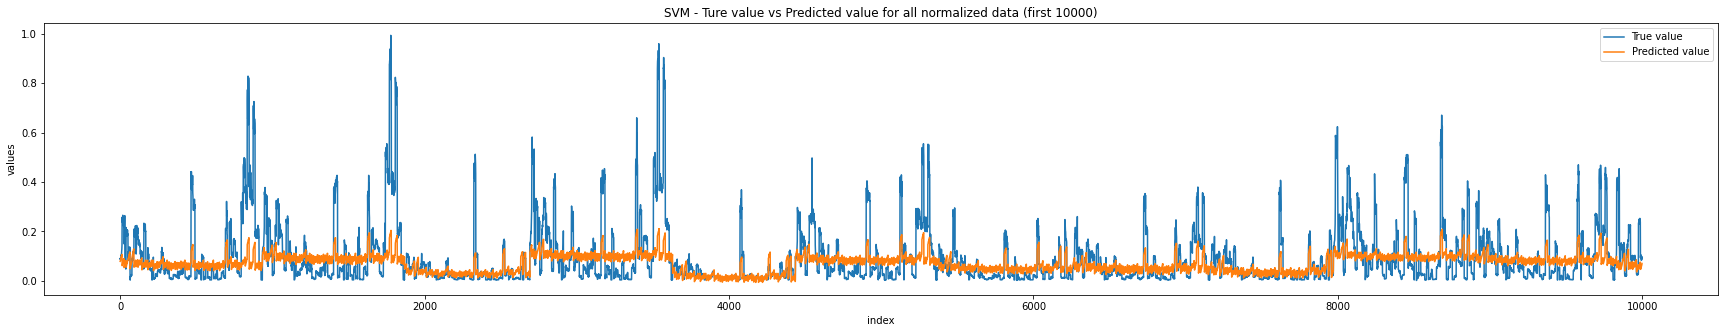

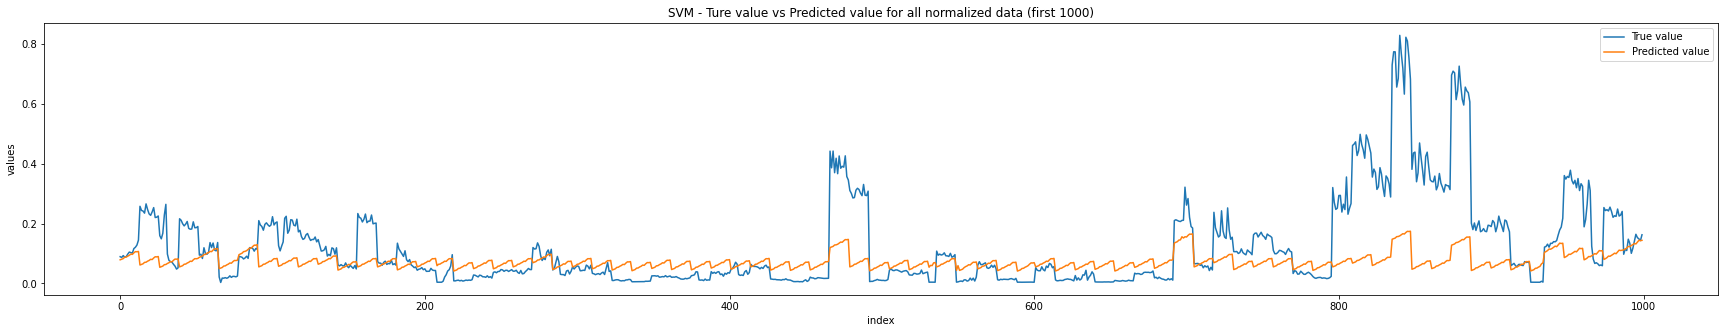

In [ ]:
line_plot(svm_holdout_predict, y_test, 'True value','Predicted value', 'SVM - Ture value vs Predicted value for all normalized data', 'index','values')
line_plot(svm_holdout_predict[:10000], y_test[:10000], 'True value','Predicted value', 'SVM - Ture value vs Predicted value for all normalized data (first 10000)', 'index','values')
line_plot(svm_holdout_predict[:1000], y_test[:1000], 'True value','Predicted value', 'SVM - Ture value vs Predicted value for all normalized data (first 1000)', 'index','values')

#### add dummies to data2 and normalize, train, mse

In [ ]:
# for SVM data2
train_dataframe = pd.get_dummies(train_dataframe, columns=["Dept"])
train_dataframe = pd.get_dummies(train_dataframe, columns=["Store"])
train_dataframe = pd.get_dummies(train_dataframe, columns=["Type"])
train_dataframe = train_dataframe.fillna(0)

X = train_dataframe.drop(columns=['Temperature','CPI','Fuel_Price','IsHoliday','Unemployment']) 

threshold_date = pd.to_datetime('2012-08-03').strftime('%Y-%m-%d')

all_train = X[X.Date<threshold_date]
all_test = X[X.Date>=threshold_date]

all_train = all_train.drop(columns=['Date'])
all_test = all_test.drop(columns=['Date'])

scaler = MinMaxScaler()
all_train = scaler.fit_transform(all_train)
all_test = scaler.fit_transform(all_test)

X_train = all_train[:, 1:]
X_test = all_test[:, 1:]

y_train = all_train[:, 0]
y_test = all_test[:, 0]
# X = train_dataframe.drop(columns=['Temperature','CPI','Fuel_Price','IsHoliday','Unemployment']) 
svr = SVR(kernel='rbf',gamma='auto').fit(X_train, y_train)
svm_holdout_predict = svr.predict(X_test)
origin_y_test, origin_svm_holdout_predict = inverse_transform(scaler, all_test, svm_holdout_predict)
mean_squared_error(origin_y_test, origin_svm_holdout_predict)

365721066.2852313

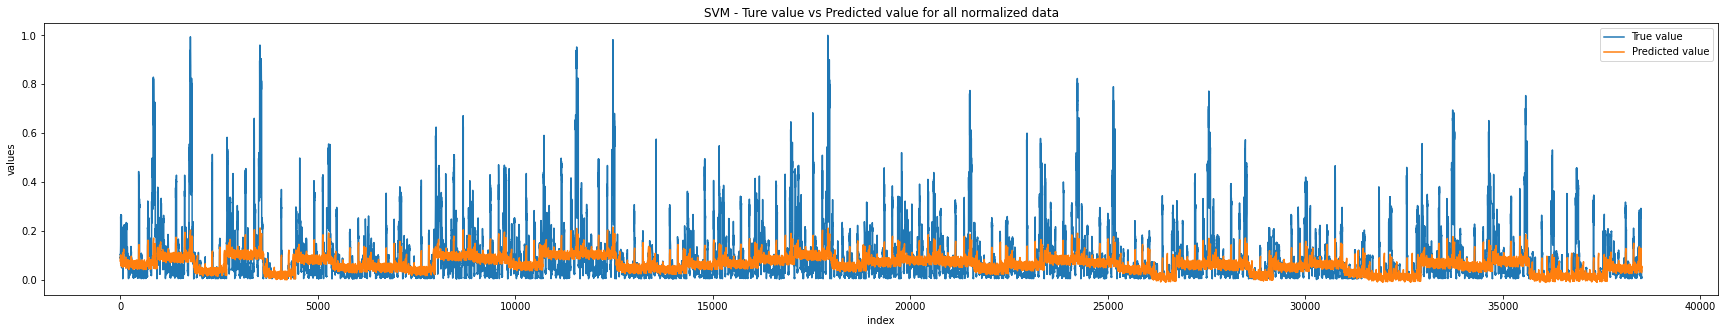

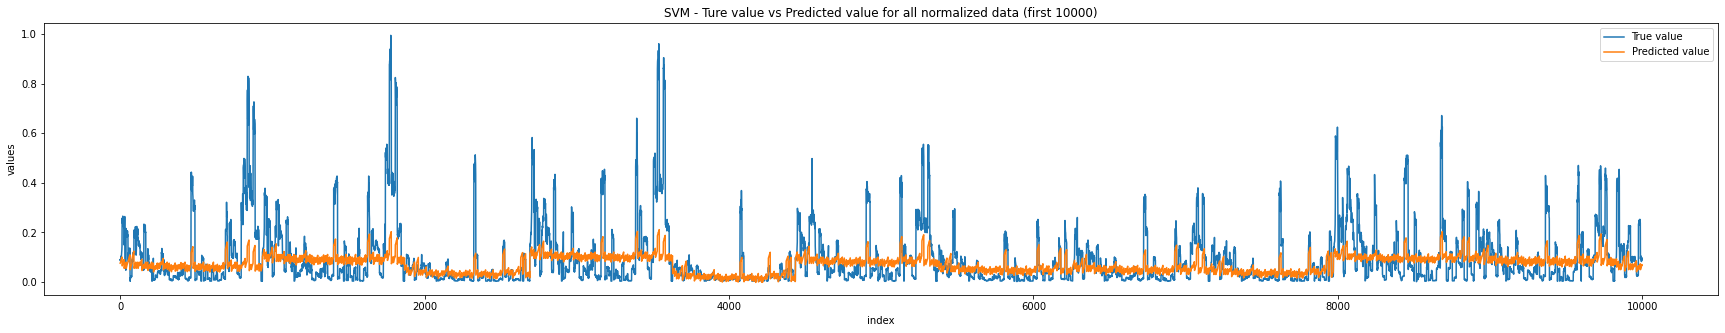

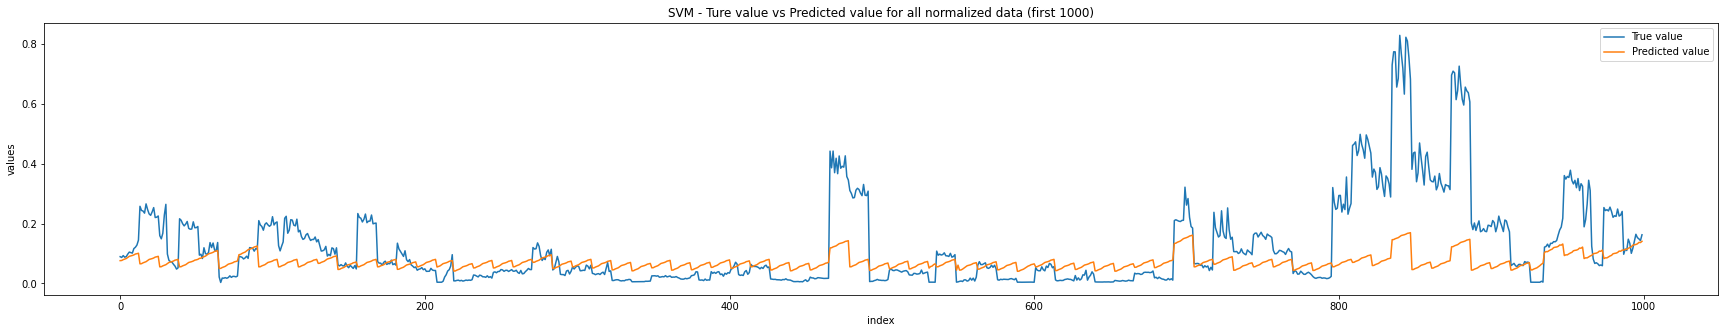

In [ ]:
line_plot(svm_holdout_predict, y_test, 'True value','Predicted value', 'SVM - Ture value vs Predicted value for all normalized data', 'index','values')
line_plot(svm_holdout_predict[:10000], y_test[:10000], 'True value','Predicted value', 'SVM - Ture value vs Predicted value for all normalized data (first 10000)', 'index','values')
line_plot(svm_holdout_predict[:1000], y_test[:1000], 'True value','Predicted value', 'SVM - Ture value vs Predicted value for all normalized data (first 1000)', 'index','values')

##### grid search best parameters

In [ ]:
svr = SVR(kernel='rbf',gamma='auto',C=0.001).fit(X_train, y_train)
svm_holdout_predict = svr.predict(X_test)
origin_y_test, origin_svm_holdout_predict = inverse_transform(scaler, all_test, svm_holdout_predict)
mean_squared_error(origin_y_test, origin_svm_holdout_predict)

495253505.3369912

In [ ]:
line_plot(svm_holdout_predict, y_test, 'True value','Predicted value', 'SVM - Ture value vs Predicted value for all normalized data', 'index','values')
line_plot(svm_holdout_predict[:10000], y_test[:10000], 'True value','Predicted value', 'SVM - Ture value vs Predicted value for all normalized data (first 10000)', 'index','values')
line_plot(svm_holdout_predict[:1000], y_test[:1000], 'True value','Predicted value', 'SVM - Ture value vs Predicted value for all normalized data (first 1000)', 'index','values')

### result of Store1 data

#### add dummies to data 1 and normalize, train, mse

In [ ]:
X = train_dataframe.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5','Temperature','CPI','Fuel_Price','Type','IsHoliday','Unemployment'])


# for SVM data1
train_dataframe = pd.get_dummies(train_dataframe, columns=["Dept"])

threshold_date = pd.to_datetime('2012-08-03').strftime('%Y-%m-%d')

all_train = X[X.Date<threshold_date]
all_test = X[X.Date>=threshold_date]

all_train = all_train.drop(columns=['Date'])
all_test = all_test.drop(columns=['Date'])

train_df = pd.DataFrame(all_train, columns=['Weekly_Sales','Store', 'Dept',  'Size', 'Week_Number'])
test_df = pd.DataFrame(all_test, columns=['Weekly_Sales','Store', 'Dept',  'Size', 'Week_Number'])

scaler = MinMaxScaler()
all_train = scaler.fit_transform(train_df)
all_test = scaler.fit_transform(test_df)

X_train = all_train[:, 1:]
X_test = all_test[:, 1:]

y_train = all_train[:, 0]
y_test = all_test[:, 0]
# X = train_dataframe.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5','Temperature','CPI','Fuel_Price','Type','IsHoliday','Unemployment'])
svr = SVR(kernel='rbf',gamma='auto').fit(X_train, y_train)
svm_holdout_predict = svr.predict(X_test)
origin_y_test, origin_svm_holdout_predict = inverse_transform(scaler, all_test, svm_holdout_predict)
mean_squared_error(origin_y_test, origin_svm_holdout_predict)

610861294.7464628

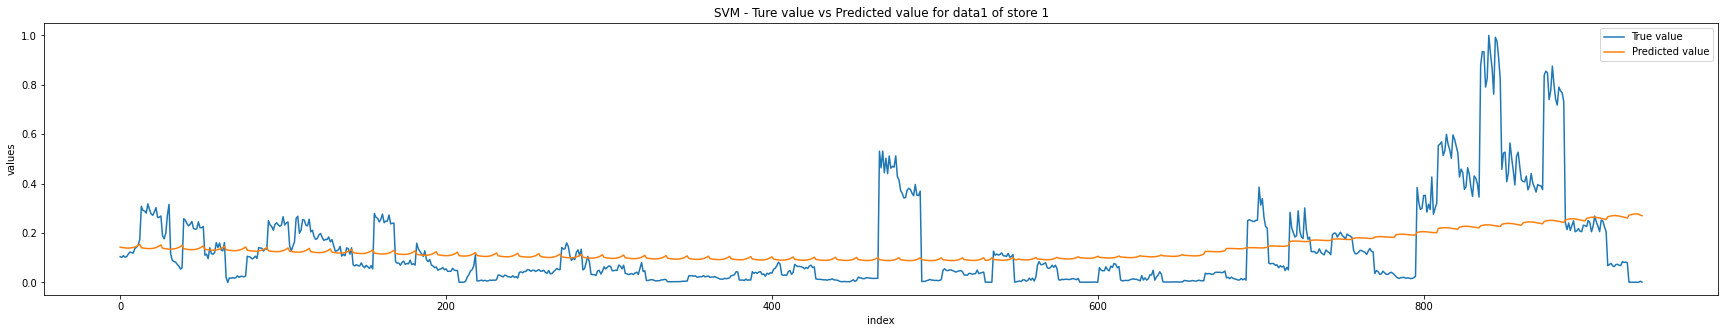

In [ ]:
line_plot(svm_holdout_predict, y_test, 'True value','Predicted value', 'SVM - Ture value vs Predicted value for the normalized data of store 1', 'index','values')


#### all data -- no drop

In [ ]:
# for SVM data3
train_dataframe = pd.get_dummies(train_dataframe, columns=["Dept"])
train_dataframe = pd.get_dummies(train_dataframe, columns=["Store"])
train_dataframe = pd.get_dummies(train_dataframe, columns=["Type"])
train_dataframe = train_dataframe.fillna(0)

X = train_dataframe#.drop(columns=['Temperature','CPI','Fuel_Price','IsHoliday','Unemployment']) 

threshold_date = pd.to_datetime('2012-08-03').strftime('%Y-%m-%d')

all_train = X[X.Date<threshold_date]
all_test = X[X.Date>=threshold_date]

all_train = all_train.drop(columns=['Date'])
all_test = all_test.drop(columns=['Date'])

scaler = MinMaxScaler()
all_train = scaler.fit_transform(all_train)
all_test = scaler.fit_transform(all_test)

X_train = all_train[:, 1:]
X_test = all_test[:, 1:]

y_train = all_train[:, 0]
y_test = all_test[:, 0]
# X = train_dataframe.drop(columns=['Temperature','CPI','Fuel_Price','IsHoliday','Unemployment']) 
svr = SVR(kernel='rbf',gamma='auto').fit(X_train, y_train)
svm_holdout_predict = svr.predict(X_test)
origin_y_test, origin_svm_holdout_predict = inverse_transform(scaler, all_test, svm_holdout_predict)
mean_squared_error(origin_y_test, origin_svm_holdout_predict)
# 250630642.5940605

256800138.36481607

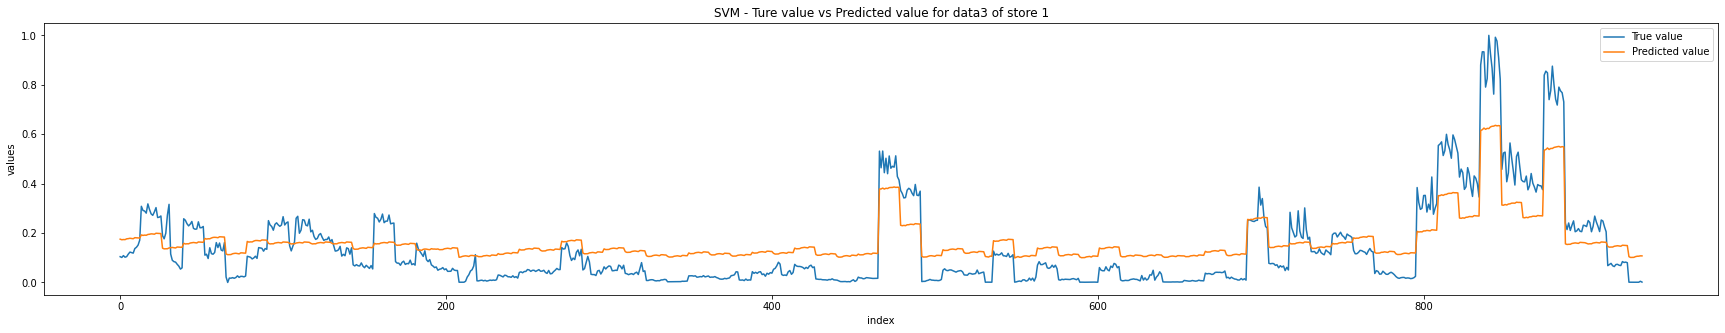

In [ ]:
line_plot(svm_holdout_predict, y_test, 'True value','Predicted value', 'SVM - Ture value vs Predicted value for the normalized data of store 1', 'index','values')

#### add dummies to data2 and normalize, train, mse

In [ ]:
# for SVM data2
train_dataframe = pd.get_dummies(train_dataframe, columns=["Dept"])
train_dataframe = pd.get_dummies(train_dataframe, columns=["Store"])
train_dataframe = pd.get_dummies(train_dataframe, columns=["Type"])
train_dataframe = train_dataframe.fillna(0)

X = train_dataframe.drop(columns=['Temperature','CPI','Fuel_Price','IsHoliday','Unemployment']) 

threshold_date = pd.to_datetime('2012-08-03').strftime('%Y-%m-%d')

all_train = X[X.Date<threshold_date]
all_test = X[X.Date>=threshold_date]

all_train = all_train.drop(columns=['Date'])
all_test = all_test.drop(columns=['Date'])

scaler = MinMaxScaler()
all_train = scaler.fit_transform(all_train)
all_test = scaler.fit_transform(all_test)

X_train = all_train[:, 1:]
X_test = all_test[:, 1:]

y_train = all_train[:, 0]
y_test = all_test[:, 0]
# X = train_dataframe.drop(columns=['Temperature','CPI','Fuel_Price','IsHoliday','Unemployment']) 
svr = SVR(kernel='rbf',gamma='auto').fit(X_train, y_train)
svm_holdout_predict = svr.predict(X_test)
origin_y_test, origin_svm_holdout_predict = inverse_transform(scaler, all_test, svm_holdout_predict)
mean_squared_error(origin_y_test, origin_svm_holdout_predict)

250630642.5940605

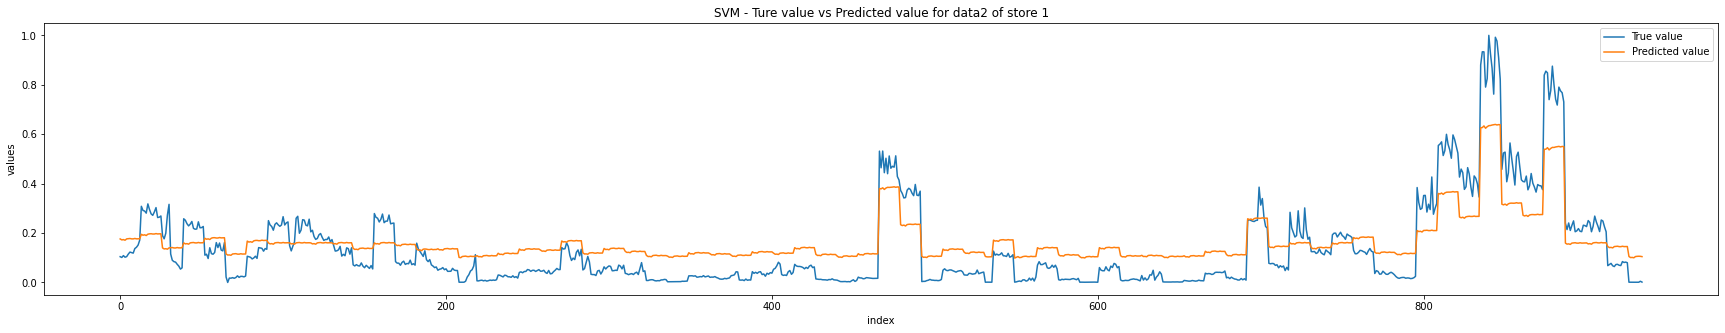

In [ ]:
line_plot(svm_holdout_predict, y_test, 'True value','Predicted value', 'SVM - Ture value vs Predicted value for the normalized data of store 1', 'index','values')

#### without markdown 1-5

In [ ]:
# for SVM data4 - normalized
train_dataframe = pd.get_dummies(train_dataframe, columns=["Dept"])
train_dataframe = pd.get_dummies(train_dataframe, columns=["Store"])
train_dataframe = pd.get_dummies(train_dataframe, columns=["Type"])
train_dataframe = train_dataframe.fillna(0)

X = train_dataframe.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5']) 

threshold_date = pd.to_datetime('2012-08-03').strftime('%Y-%m-%d')

all_train = X[X.Date<threshold_date]
all_test = X[X.Date>=threshold_date]

all_train = all_train.drop(columns=['Date'])
all_test = all_test.drop(columns=['Date'])

scaler = MinMaxScaler()
all_train = scaler.fit_transform(all_train)
all_test = scaler.fit_transform(all_test)

X_train = all_train[:, 1:]
X_test = all_test[:, 1:]

y_train = all_train[:, 0]
y_test = all_test[:, 0]

svr = SVR(kernel='rbf',gamma='auto').fit(X_train, y_train)
svm_holdout_predict = svr.predict(X_test)
origin_y_test, origin_svm_holdout_predict = inverse_transform(scaler, all_test, svm_holdout_predict)
mean_squared_error(origin_y_test, origin_svm_holdout_predict)

250602190.40401748

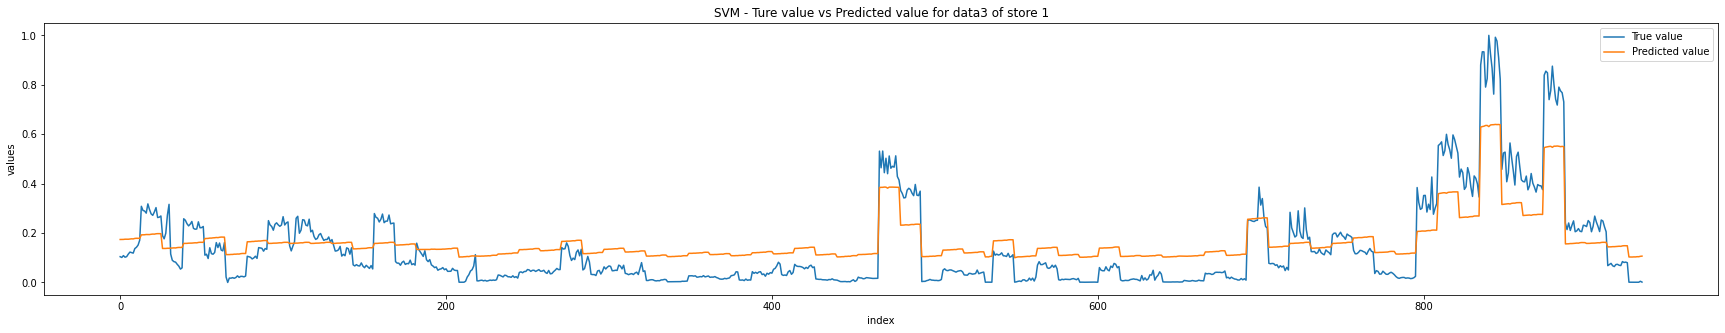

In [ ]:
line_plot(svm_holdout_predict, y_test, 'True value','Predicted value', 'SVM - Ture value vs Predicted value for data3 of store 1', 'index','values')

#### without markdown 1-5, un-normalized result

In [ ]:
train_dataframe = pd.get_dummies(train_dataframe, columns=["Dept"])
train_dataframe = pd.get_dummies(train_dataframe, columns=["Store"])
train_dataframe = pd.get_dummies(train_dataframe, columns=["Type"])
train_dataframe = train_dataframe.fillna(0)
X = train_dataframe.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5']) 

threshold_date = pd.to_datetime('2012-08-03').strftime('%Y-%m-%d')

all_train = X[X.Date<threshold_date]
all_test = X[X.Date>=threshold_date]

all_train = all_train.drop(columns=['Date'])
all_test = all_test.drop(columns=['Date'])

# # scaler = MinMaxScaler()
# # all_train = scaler.fit_transform(all_train)
# # all_test = scaler.fit_transform(all_test)



In [ ]:
X_train = all_train.drop(columns=['Weekly_Sales'])
X_test = all_test.drop(columns=['Weekly_Sales'])

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']


svr = SVR(kernel='rbf',gamma='auto').fit(X_train, y_train)
svm_holdout_predict = svr.predict(X_test)
mean_squared_error(y_test, svm_holdout_predict)

943951160.9912517

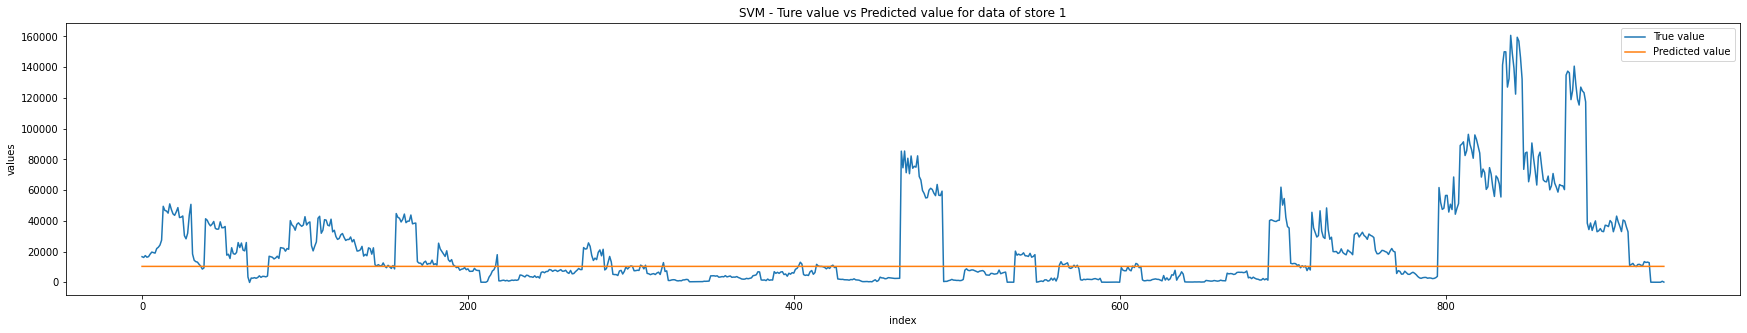

In [ ]:
line_plot(svm_holdout_predict, y_test, 'True value','Predicted value', 'SVM - Ture value vs Predicted value for data of store 1', 'index','values')

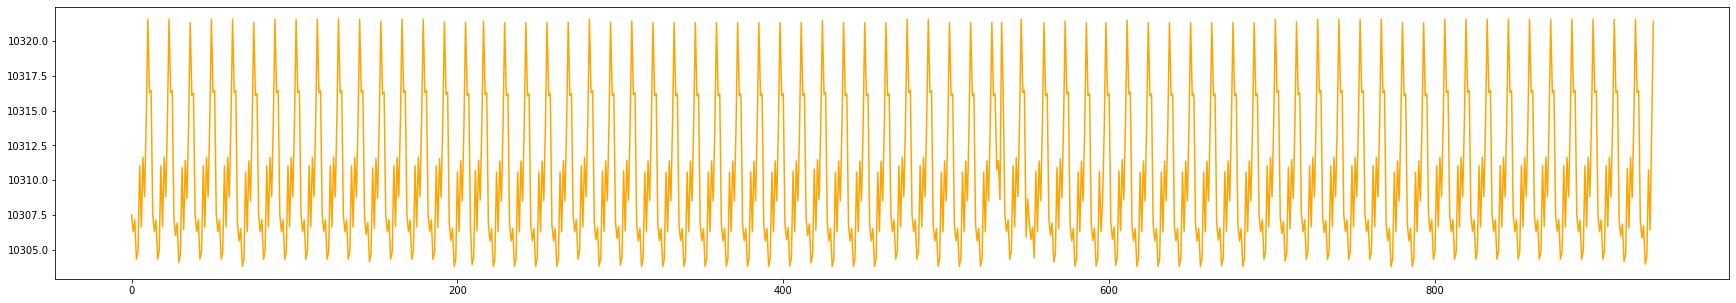

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(np.arange(len(svm_holdout_predict)), svm_holdout_predict, color='orange')

##### without markdown 1-5 after grid search

In [ ]:
svr = SVR(kernel='rbf',gamma='auto',C=0.001).fit(X_train, y_train)
svm_holdout_predict = svr.predict(X_test)
origin_y_test, origin_svm_holdout_predict = inverse_transform(scaler, all_test, svm_holdout_predict)
mean_squared_error(origin_y_test, origin_svm_holdout_predict)

816378933.8955956

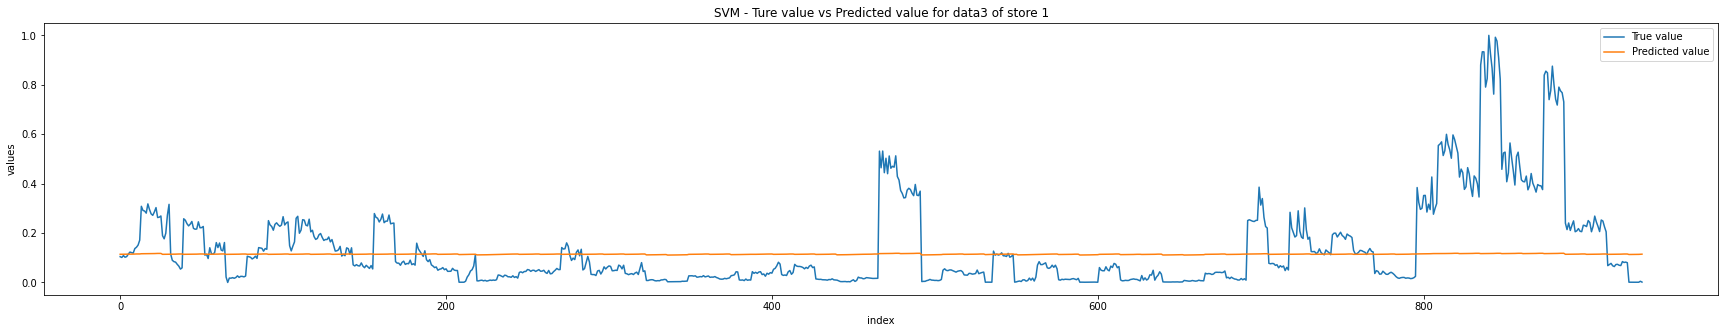

In [ ]:
line_plot(svm_holdout_predict, y_test, 'True value','Predicted value', 'SVM - Ture value vs Predicted value for data3 of store 1', 'index','values')

## SVR train, GRID Search

In [ ]:
svr = SVR(kernel='rbf',gamma='auto').fit(X_train, y_train)
svm_holdout_predict = svr.predict(X_test)

In [ ]:
## check kernel
model = SVR(kernel='rbf')    
param_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma' : ('auto','scale')}    
grid_search = GridSearchCV(model, param_grid, n_jobs = 8, verbose=1)    
grid_search.fit(X_train, y_train)  

# param = {kernel='rbf','C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},
# modelsvr = SVR()
# grids = GridSearchCV(modelsvr,param,cv=5)
# grids.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   43.1s
[Parallel(n_jobs=8)]: Done  70 out of  70 | elapsed:   59.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': ('auto', 'scale')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
grid_search.best_params_

{'C': 0.001, 'gamma': 'auto'}

## Result of only store 1 data -- with normalize

In [ ]:
svr = SVR(kernel='rbf',gamma='auto').fit(X_train, y_train)
svm_holdout_predict = svr.predict(X_test)

Text(0, 0.5, 'values')

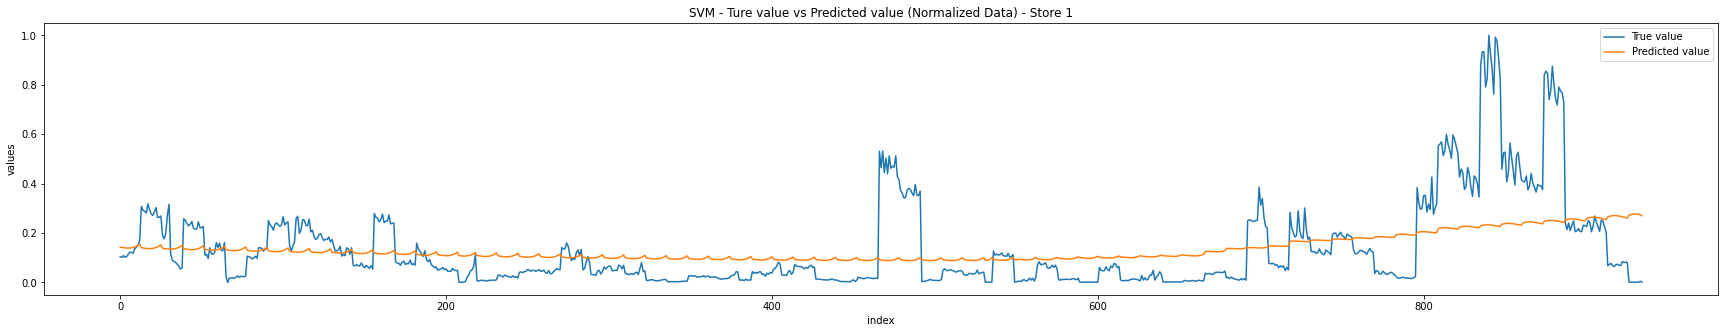

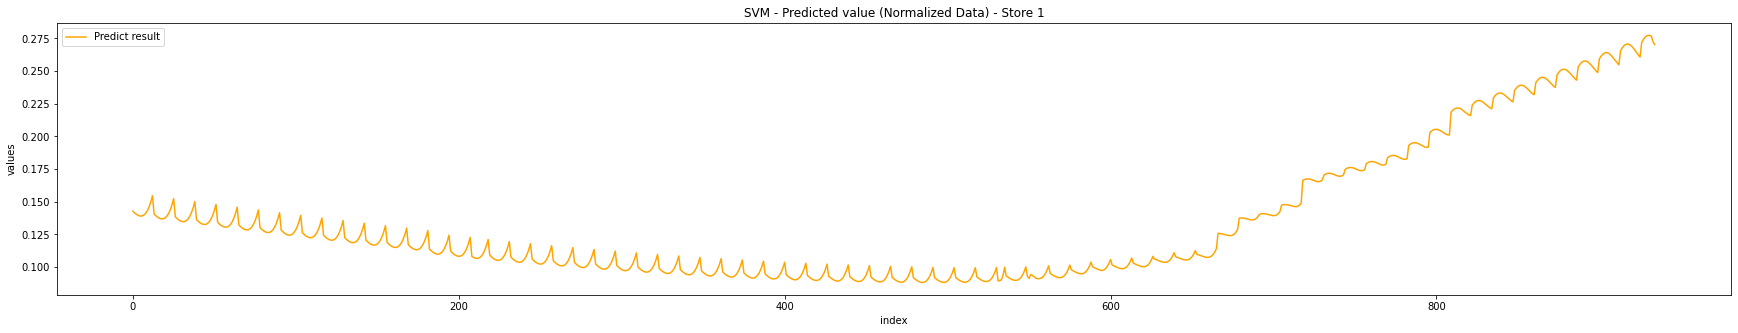

In [ ]:
line_plot(svm_holdout_predict, y_test, 'True value','Predicted value', 'SVM - Ture value vs Predicted value (Normalized Data) - Store 1', 'index','values')
plt.figure(figsize=(30,5))
plt.plot(np.arange(len(svm_holdout_predict)),svm_holdout_predict,color='orange', label = 'Predict result')
plt.legend()
plt.title('SVM - Predicted value (Normalized Data) - Store 1')
plt.xlabel('index') 
plt.ylabel('values')

In [ ]:
mean_squared_error(y_test, svm_holdout_predict)

0.023615276706206202

In [ ]:
add_0_array = np.zeros((len(svm_holdout_predict), all_test.shape[1]-1))
add_0_svm_holdout_predict = np.column_stack((svm_holdout_predict, add_0_array))
add_0_svm_holdout_predict = scaler.inverse_transform(add_0_svm_holdout_predict) 
print(svm_holdout_predict.shape, add_0_svm_holdout_predict.shape)
origin_svm_holdout_predict = add_0_svm_holdout_predict[:,0]
mean_squared_error(origin_y_test, origin_svm_holdout_predict)

(935,) (935, 5)


610861294.7464628

In [ ]:
np.savetxt("svm_holdout_predict.txt", svm_holdout_predict);


In [ ]:
line_plot(svm_holdout_predict, y_test, 'True value','Predicted value', 'SVM - Ture value vs Predicted value for first 1000 data', 'index','values')


# Neural Network

## Read file

In [ ]:
root_dir = '/content/drive/My Drive/Data Mining/'   #Tianli

base_dir = root_dir + 'Data Mining/Project/'
train_file = base_dir + 'Store Sales data/train.csv'
stores_file = base_dir + 'Store Sales data/stores.csv'
features_file = base_dir + 'Store Sales data/features.csv'
test_file = base_dir + 'Store Sales data/test.csv'

In [ ]:
# read files
train_dataframe = pd.read_csv(train_file)
stores_dataframe = pd.read_csv(stores_file)
features_dataframe = pd.read_csv(features_file)
test_dataframe = pd.read_csv(test_file)
features_dataframe = features_dataframe.drop(columns='IsHoliday')

# join other tables
train_dataframe = pd.merge(train_dataframe, stores_dataframe, how='left', left_on='Store', right_on='Store')
train_dataframe = pd.merge(train_dataframe, features_dataframe,  how='left', left_on=['Store','Date'], right_on = ['Store','Date']) 


# convert date to week number
train_dataframe['Date'] = pd.to_datetime(train_dataframe['Date'], errors='coerce')
train_dataframe['Week_Number'] = train_dataframe['Date'].dt.week
test_dataframe['Date'] = pd.to_datetime(test_dataframe['Date'], errors='coerce')
test_dataframe['Week_Number'] = test_dataframe['Date'].dt.week


# convert a single column of boolean values to a column of integers 1 or 0
train_dataframe['IsHoliday'] = train_dataframe['IsHoliday'].astype(int)

# # select store
# train_dataframe = train_dataframe.loc[train_dataframe['Store'] == 1]

# only for neural network
train_dataframe = pd.get_dummies(train_dataframe, columns=["Dept"])
train_dataframe = pd.get_dummies(train_dataframe, columns=["Store"])
train_dataframe = pd.get_dummies(train_dataframe, columns=["Type"])
train_dataframe = train_dataframe.fillna(0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


## Split train test

In [ ]:
# X = train_dataframe.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5']) 
# X = train_dataframe.drop(columns=['Temperature','CPI','Fuel_Price','IsHoliday','Unemployment']) 
X = train_dataframe
threshold_date = pd.to_datetime('2012-08-03').strftime('%Y-%m-%d')

all_train = X[X.Date<threshold_date]
all_test = X[X.Date>=threshold_date]


all_train = all_train.drop(columns=['Date'])
all_test = all_test.drop(columns=['Date'])

## Normalization

In [ ]:
scaler = MinMaxScaler()
all_train = scaler.fit_transform(all_train)
all_test = scaler.fit_transform(all_test)

X_train = all_train[:, 1:]
X_test = all_test[:, 1:]

y_train = all_train[:, 0]
y_test = all_test[:, 0]

## Build Nueral Netwrok


In [ ]:
def build_model(N):
  model = tf.keras.Sequential([ 
        tf.keras.layers.Dense(N, activation='sigmoid'),
        # tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(N * 2, activation='sigmoid'),
        # tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(N, activation='sigmoid'),
        # tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1)
        ])
  return model

def train_model(model, X, y):
  model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=["mae"])

  # train model
  history = model.fit(X, y,
          batch_size=10,
          epochs=10,
          validation_split=0.2,
          verbose=0)
  return history

1205/1205 [==============================] - 2s 2ms/step - loss: 0.0098 - mae: 0.0540
[0.009842961095273495, 0.054027166217565536]


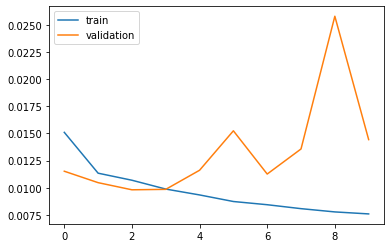

In [ ]:
# build model
model = build_model(256)
# train model
history = train_model(model, X_train, y_train)
# test model 

test_loss = model.evaluate(x=X_test, y=y_test)
# prediction
predictions = model.predict(X_test)

plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='validation')
plt.legend()
print(test_loss)
plt.show()

In [ ]:
print(test_loss)

[0.02768753655254841, 0.07428280264139175]


test loss: [0.012419973500072956, 0.06210043281316757] # drop markdown1-5 'Type' \
test loss: [0.012550094164907932, 0.06010643392801285] # drop markdown 1-5, 'Type', 'Temperature','CPI','Fuel_Price'\
test loss: [0.009663271717727184, 0.05463981255888939] # drop type\
test loss: [0.00855647586286068, 0.0500960573554039] # drop 'Temperature','CPI','Fuel_Price','IsHoliday','Unemployment'

## NN inverse transform

In [ ]:
origin_all_test = scaler.inverse_transform(all_test)
origin_y_test = origin_all_test[:,0]


In [ ]:
add_0_array = np.zeros((len(predictions), all_test.shape[1]-1))
add_0_nn_holdout_predict = np.column_stack((predictions, add_0_array))
add_0_nn_holdout_predict = scaler.inverse_transform(add_0_nn_holdout_predict) #(len(svm_holdout_predict),131))


In [ ]:
origin_nn_holdout_predict = add_0_nn_holdout_predict[:,0]
mean_squared_error(origin_y_test, origin_nn_holdout_predict)

716199256.0245992

364232502.86084193 # drop 'Temperature','CPI','Fuel_Price','IsHoliday','Unemployment' \ 

359575814.08983916 # drop markdown 1-5 \

630995590.5521697 # only store 1 all feature \
287375054.3052295 # all features


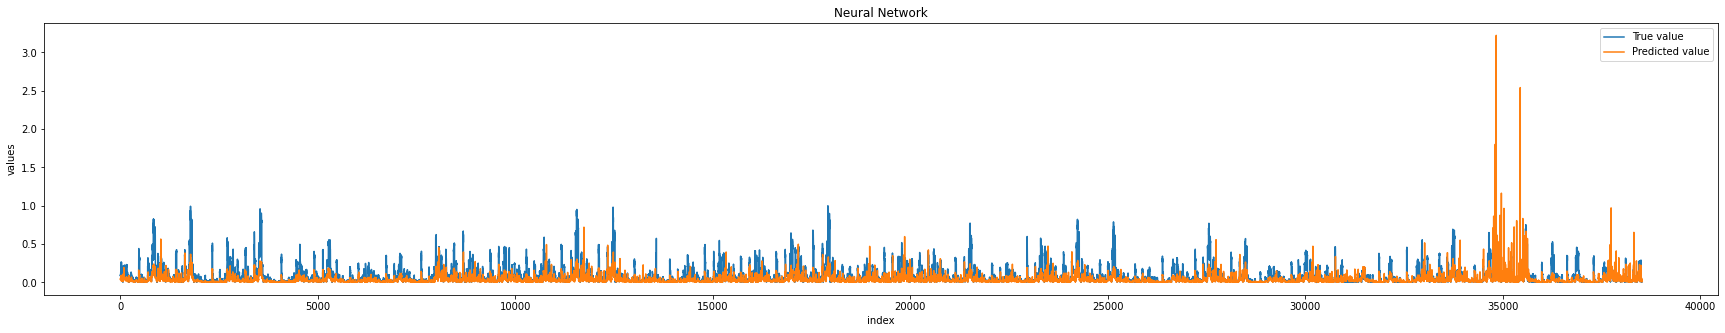

In [ ]:
line_plot(predictions, y_test, 'True value','Predicted value', 'Neural Network', 'index','values')

# kaggle output

In [ ]:
import csv
submit_file = base_dir + 'Store Sales data/sampleSubmission.csv'
submit_dataframe = pd.read_csv(submit_file)

In [ ]:
write_file = open("test.csv", 'w') #write csv format to file
writer = csv.writer(write_file)
writer.writerow(['Id','Weekly_Sales'])
for i in range(len(submit_dataframe)):
  rows = [submit_dataframe.Id[i], rf_predict[i]]
  writer.writerow(rows)